How to use the Data-Driven Model (DDM)
-------------------------------

The example shows how to initialize the Data Drive Model and use it within MCEq.

The DDM is described in the following publication https://inspirehep.net/literature/2088973.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# import solver related modules
from MCEq.core import MCEqRun
import mceq_config as config

# import primary model choices
import crflux.models as pm

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150

Create an instance of an MCEqRun class. Most options are defined in the `mceq_config` module, and do not require change. Look into `mceq_config.py` or use the documentation.

If the initialization succeeds it will print out some information according to the debug level. 

In [3]:
# Compare to this model
cmp_model = "SIBYLL2.3d"

In [4]:
mceq_default = MCEqRun(
    # provide the string of the interaction model
    interaction_model=cmp_model,
    # primary cosmic ray flux model
    primary_model=(pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0,
)

MCEqRun::set_interaction_model(): SIBYLL23D


ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


DDM needs a baseline model since the model only replaces some relevant particle production channels and keeps those from the original model for the other channels.

In [5]:
mceq_ddm = MCEqRun(
    # provide the string of the interaction model
    interaction_model=cmp_model,
    # primary cosmic ray flux model
    primary_model=(pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0,
)

MCEqRun::set_interaction_model(): SIBYLL23D


ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


Define variables and angles
-------------------------

In [6]:
# Power of energy to scale the flux (the results will be returned as E**mag * flux)
mag = 3

# obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_default.e_grid

# Dictionary for results
flux = {}

# Define a zenith angle, counted positively from vertical direction. Theta = 0. means vertical, theta = 90. horizontal
theta = 60.0

## Demonstration how to initialize just the DDM model

In [7]:
from MCEq.ddm import DataDrivenModel
from os.path import join

In [8]:
ddm = DataDrivenModel(join(config.data_dir, "DDM_1.0.npy"))

In [9]:
print(ddm)

DDM channels:
	2212 -> 2112:
		0: ebeam = 158.0 GeV, x17=False, tune v|e=1.000|1.000
	-211 -> -2212:
		0: ebeam = 158.0 GeV, x17=True, tune v|e=1.000|1.000
		1: ebeam = 350.0 GeV, x17=True, tune v|e=1.000|1.000
	2212 -> 2212:
		0: ebeam = 158.0 GeV, x17=False, tune v|e=1.000|1.000
	-211 -> -211:
		0: ebeam = 158.0 GeV, x17=True, tune v|e=1.000|1.000
		1: ebeam = 350.0 GeV, x17=True, tune v|e=1.000|1.000
	2212 -> -321:
		0: ebeam = 31.0 GeV, x17=False, tune v|e=1.000|1.000
		1: ebeam = 158.0 GeV, x17=False, tune v|e=1.000|1.000
	-211 -> 211:
		0: ebeam = 158.0 GeV, x17=True, tune v|e=1.000|1.000
		1: ebeam = 350.0 GeV, x17=True, tune v|e=1.000|1.000
	2212 -> -211:
		0: ebeam = 31.0 GeV, x17=False, tune v|e=1.000|1.000
		1: ebeam = 158.0 GeV, x17=False, tune v|e=1.000|1.000
	-211 -> 2212:
		0: ebeam = 158.0 GeV, x17=True, tune v|e=1.000|1.000
		1: ebeam = 350.0 GeV, x17=True, tune v|e=1.000|1.000
	-211 -> 321:
		0: ebeam = 158.0 GeV, x17=True, tune v|e=1.000|1.000
		1: ebeam = 350.0 GeV,

### Inject ddm into MCEq

In [10]:
config.debug_level = 3

In [11]:
mceq_default.inject_ddm(ddm)

DataDrivenModel::ddm_matrices(): Generating 2212 -> 2112 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> -2212 DDM matrix


DataDrivenModel::ddm_matrices(): Generating 2212 -> 2212 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> -211 DDM matrix
DataDrivenModel::ddm_matrices(): Generating 2212 -> -321 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> 211 DDM matrix
DataDrivenModel::ddm_matrices(): Generating 2212 -> -211 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> 2212 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> 321 DDM matrix
DataDrivenModel::ddm_matrices(): Generating -211 -> -321 DDM matrix
DataDrivenModel::ddm_matrices(): Generating 2212 -> -2212 DDM matrix
DataDrivenModel::ddm_matrices(): Generating 2212 -> 211 DDM matrix
DataDrivenModel::ddm_matrices(): Generating 2212 -> 321 DDM matrix
DataDrivenModel::ddm_matrices(): Generating DDM K0 matrices from isospin symm.
DDM matrices injected into MCEq:
	2212-->2112, isospin: 2112 --> 2212
	-211-->-2212, isospin: 211 --> -2112
	2212-->2212, isospin: 2112 --> 2112
	-211-->-211, isospin: 211 --> 

Calculate average flux
---------------------

In [12]:
# Set the zenith angle
mceq_default.set_theta_deg(theta)
mceq_ddm.set_theta_deg(theta)
# Run the solver
mceq_default.solve()
mceq_ddm.solve()

MCEqRun::set_theta_deg(): Zenith angle  60.00
MCEqRun::set_theta_deg(): Zenith angle  60.00
MCEqRun::solve(): Launching euler solver
MCEqRun::_calculate_integration_path(): X_surface = 2060.58g/cm2
MCEqRun::solve(): for 2862 integration steps.


solv_CUDA_sparse(): Performance:   0.32ms/iteration
MCEqRun::solve(): time elapsed during integration:  0.93sec
MCEqRun::solve(): Launching euler solver
MCEqRun::_calculate_integration_path(): X_surface = 2060.58g/cm2
MCEqRun::solve(): for 2862 integration steps.
solv_CUDA_sparse(): Performance:   0.32ms/iteration
MCEqRun::solve(): time elapsed during integration:  0.93sec


Obtain solution at the surface
-------------------------------

The fluxes of the particle (e.g., $\mu^+$) and the anti-particle ($\mu^-$) are summed in this example.

In [13]:
(
    mu_conv,
    mu_total,
    mu_charge,
    numu_conv,
    numu_total,
    numu_ratio,
    nue_conv,
    nue_total,
    nue_ratio,
) = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)

for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    # _conv means conventional (mostly pions and kaons)
    mu_conv[mkey] = m.get_solution("conv_mu+", mag) + m.get_solution("conv_mu-", mag)

    # total means conventional + prompt
    mu_total[mkey] = m.get_solution("total_mu+", mag) + m.get_solution("total_mu-", mag)

    # Muon charge ratio
    mu_charge[mkey] = m.get_solution("total_mu+", mag) / m.get_solution(
        "total_mu-", mag
    )

    # same meaning of prefixes for muon neutrinos as for muons
    numu_conv[mkey] = m.get_solution("conv_numu", mag) + m.get_solution(
        "conv_antinumu", mag
    )

    numu_total[mkey] = m.get_solution("total_numu", mag) + m.get_solution(
        "total_antinumu", mag
    )

    numu_ratio[mkey] = m.get_solution("total_numu", mag) / m.get_solution(
        "total_antinumu", mag
    )

    # same meaning of prefixes for electron neutrinos as for muons
    nue_conv[mkey] = m.get_solution("conv_nue", mag) + m.get_solution(
        "conv_antinue", mag
    )

    nue_total[mkey] = m.get_solution("total_nue", mag) + m.get_solution(
        "total_antinue", mag
    )

    nue_ratio[mkey] = m.get_solution("total_nue", mag) / m.get_solution(
        "total_antinue", mag
    )

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1131948732.py:21: RuntimeWarning: invalid value encountered in divide
  mu_charge[mkey] = m.get_solution("total_mu+", mag) / m.get_solution(
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1131948732.py:34: RuntimeWarning: divide by zero encountered in divide
  numu_ratio[mkey] = m.get_solution("total_numu", mag) / m.get_solution(
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1131948732.py:34: RuntimeWarning: invalid value encountered in divide
  numu_ratio[mkey] = m.get_solution("total_numu", mag) / m.get_solution(
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1131948732.py:47: RuntimeWarning: divide by zero encountered in divide
  nue_ratio[mkey] = m.get_solution("total_nue", mag) / m.get_solution(
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1131948732.py:47: RuntimeWarning: invalid value encountered in divide
  nue_ratio[mkey] = m.get_solution("total_nue", mag) / m.get_solution(


Plot using matplotlib
----------------------

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1071342659.py:9: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, mu_total[cmp_model]/mu_total["DDM"], ls='-', lw=1.5, c=c)
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1071342659.py:10: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, mu_conv[cmp_model]/mu_conv["DDM"], ls='--', lw=1.5, c=c)


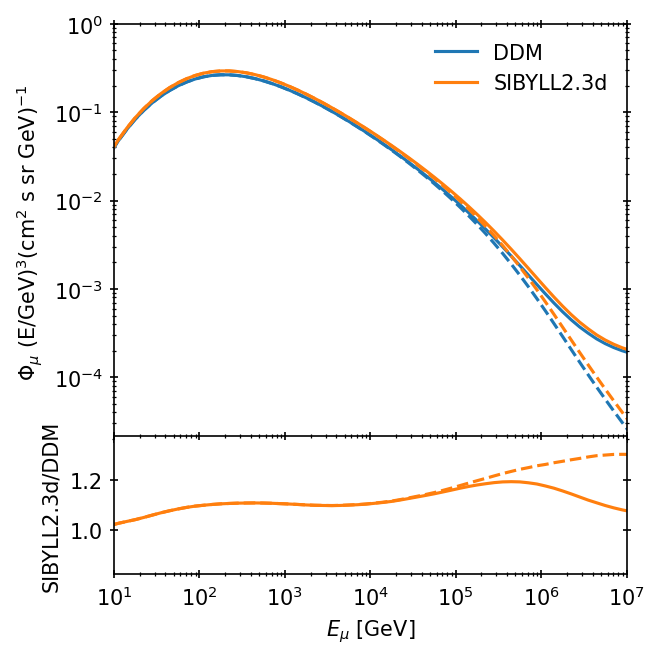

In [14]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .loglog(e_grid, mu_total[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )
    axes[0].loglog(e_grid, mu_conv[mkey], ls="--", lw=1.5, color=c)

axes[1].semilogx(e_grid, mu_total[cmp_model] / mu_total["DDM"], ls="-", lw=1.5, c=c)
axes[1].semilogx(e_grid, mu_conv[cmp_model] / mu_conv["DDM"], ls="--", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(2e-5, 1)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\mu}$ [GeV]")
axes[0].set_ylabel(
    r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + " }$" + "(cm$^{2}$ s sr GeV)$^{-1}$"
)
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)

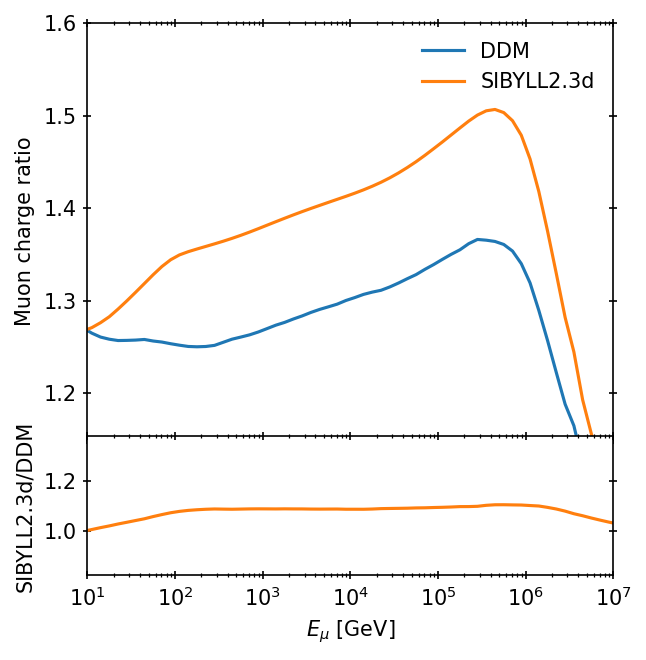

In [15]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .semilogx(e_grid, mu_charge[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )

axes[1].semilogx(e_grid, mu_charge[cmp_model] / mu_charge["DDM"], ls="-", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(1.15, 1.6)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\mu}$ [GeV]")
axes[0].set_ylabel(r"Muon charge ratio")
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\494781776.py:9: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, numu_total[cmp_model]/numu_total["DDM"], ls='-', lw=1.5, c=c)
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\494781776.py:10: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, numu_conv[cmp_model]/numu_conv["DDM"], ls='--', lw=1.5, c=c)


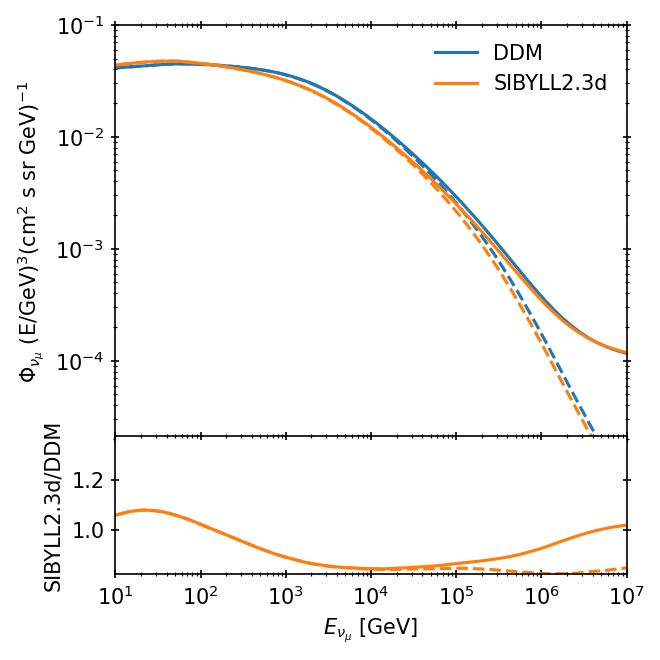

In [16]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .loglog(e_grid, numu_total[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )
    axes[0].loglog(e_grid, numu_conv[mkey], ls="--", lw=1.5, color=c)

axes[1].semilogx(e_grid, numu_total[cmp_model] / numu_total["DDM"], ls="-", lw=1.5, c=c)
axes[1].semilogx(e_grid, numu_conv[cmp_model] / numu_conv["DDM"], ls="--", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(2e-5, 1e-1)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\nu_\mu}$ [GeV]")
axes[0].set_ylabel(
    r"$\Phi_{\nu_\mu}$ (E/GeV)$^{" + str(mag) + " }$" + "(cm$^{2}$ s sr GeV)$^{-1}$"
)
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\1619951818.py:8: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, numu_ratio[cmp_model]/numu_ratio["DDM"], ls='-', lw=1.5, c=c)


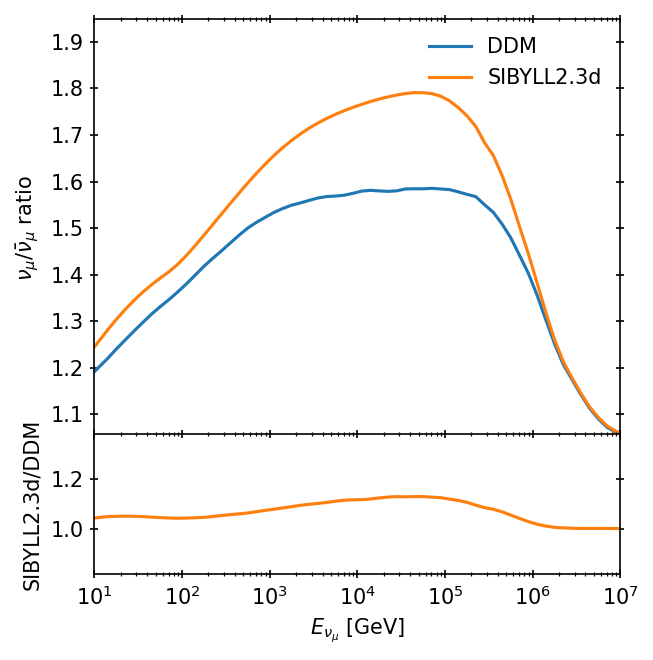

In [17]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .semilogx(e_grid, numu_ratio[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )

axes[1].semilogx(e_grid, numu_ratio[cmp_model] / numu_ratio["DDM"], ls="-", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(1.05, 1.95)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\nu_\mu}$ [GeV]")
axes[0].set_ylabel(r"${\nu_\mu}/\bar{\nu}_\mu$ ratio")
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\174878043.py:9: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, nue_total[cmp_model]/nue_total["DDM"], ls='-', lw=1.5, c=c)
C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\174878043.py:10: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, nue_conv[cmp_model]/nue_conv["DDM"], ls='--', lw=1.5, c=c)


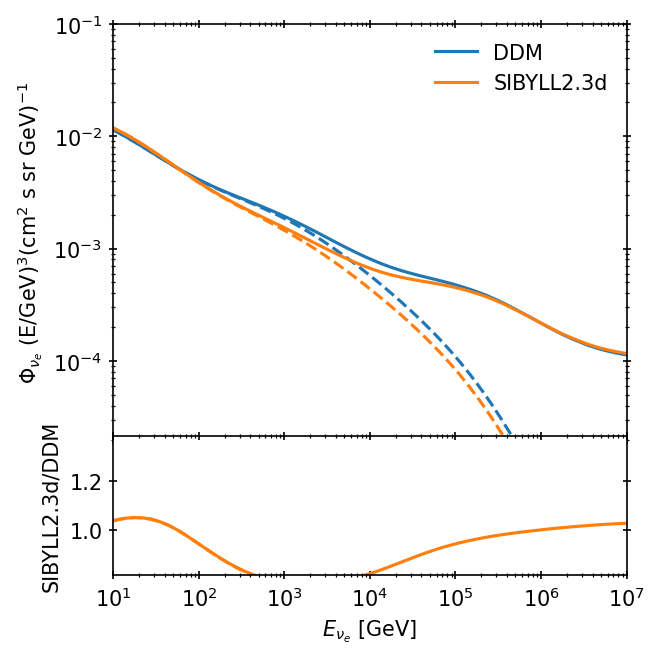

In [18]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .loglog(e_grid, nue_total[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )
    axes[0].loglog(e_grid, nue_conv[mkey], ls="--", lw=1.5, color=c)

axes[1].semilogx(e_grid, nue_total[cmp_model] / nue_total["DDM"], ls="-", lw=1.5, c=c)
axes[1].semilogx(e_grid, nue_conv[cmp_model] / nue_conv["DDM"], ls="--", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(2e-5, 1e-1)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\nu_e}$ [GeV]")
axes[0].set_ylabel(
    r"$\Phi_{\nu_e}$ (E/GeV)$^{" + str(mag) + " }$" + "(cm$^{2}$ s sr GeV)$^{-1}$"
)
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)

C:\Users\afedy\AppData\Local\Temp\ipykernel_33188\3484314006.py:8: RuntimeWarning: invalid value encountered in divide
  axes[1].semilogx(e_grid, nue_ratio[cmp_model]/nue_ratio["DDM"], ls='-', lw=1.5, c=c)


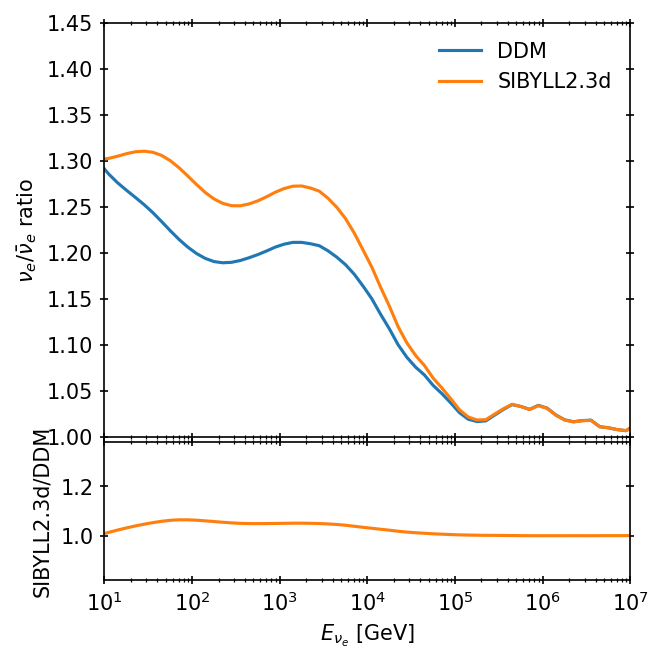

In [19]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
for mkey, m in [("DDM", mceq_ddm), (cmp_model, mceq_default)]:
    c = (
        axes[0]
        .semilogx(e_grid, nue_ratio[mkey], ls="-", lw=1.5, label=mkey)[0]
        .get_color()
    )

axes[1].semilogx(e_grid, nue_ratio[cmp_model] / nue_ratio["DDM"], ls="-", lw=1.5, c=c)
axes[0].set_xlim(10, 1e7)
axes[0].set_ylim(1, 1.45)

axes[1].set_ylim(0.82, 1.38)
axes[1].set_ylabel(f"{cmp_model}/DDM")
axes[1].set_xlabel(r"$E_{\nu_e}$ [GeV]")
axes[0].set_ylabel(r"${\nu_e}/\bar{\nu}_e$ ratio")
axes[0].legend(loc="upper right", frameon=False, numpoints=1, fontsize="medium")

_ = [
    axes[i].tick_params(
        axis="both",
        which="both",
        right=True,
        top=True,
        direction="inout",
        # labelsize=fs_ticks - 5,
    )
    for i in range(2)
]

plt.tight_layout(h_pad=-0.5)